In [1]:
import numpy as np
import pandas as pd

# This is how we import the module of Matplotlib we'll be using
import matplotlib.pyplot as plt
from scipy import optimize
import math
# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables SVG graphics inline (only use with static plots (non-Bokeh))
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv('weekly_in_situ_co2_mlo.csv')
print('Dataframe has %d data points of %d features'
      %(df.shape[0],df.shape[1]))

df.head()

Dataframe has 3331 data points of 2 features


,Date,CO2
0,1958-04-05,317.31
1,1958-04-12,317.69
2,1958-04-19,317.58
3,1958-04-26,316.48
4,1958-05-03,316.95


Criar “days” coluna

In [3]:
df['Date'] = pd.to_datetime(df['Date'],format='%Y/%m/%d')
df.head()

,Date,CO2
0,1958-04-05,317.31
1,1958-04-12,317.69
2,1958-04-19,317.58
3,1958-04-26,316.48
4,1958-05-03,316.95


In [4]:
epoch = df['Date'][0]
epoch

Timestamp('1958-04-05 00:00:00')

In [5]:
df['days'] = (df['Date']-epoch).dt.days
df.head()

,Date,CO2,days
0,1958-04-05,317.31,0
1,1958-04-12,317.69,7
2,1958-04-19,317.58,14
3,1958-04-26,316.48,21
4,1958-05-03,316.95,28


# Curva de Keeling

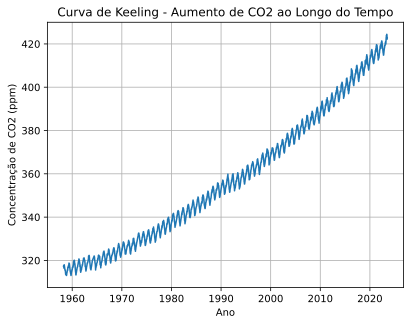

In [6]:
years = df['Date']
co2_levels = df['CO2']
plt.plot(years, co2_levels, marker='none')
plt.xlabel('Ano')
plt.ylabel('Concentração de CO2 (ppm)')
plt.title('Curva de Keeling - Aumento de CO2 ao Longo do Tempo')
plt.grid(True)
plt.show()

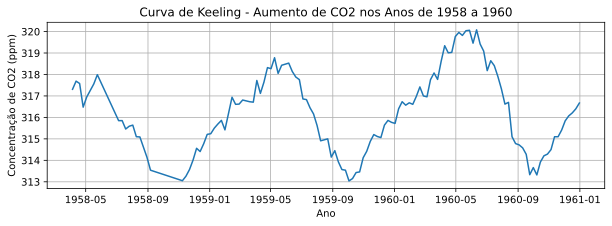

In [7]:
#de 1958 a 1960
selected_years_data = df[(df['Date'].dt.year >= 1958) & (df['Date'].dt.year <= 1960)]

selected_years = selected_years_data['Date']
co2_levels_selected = selected_years_data['CO2']

plt.figure(figsize=(10, 3)) 

# Cria um gráfico de linha usando os dados dos anos selecionados
plt.plot(selected_years, co2_levels_selected, marker='none')

# Adiciona rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Concentração de CO2 (ppm)')

# Adiciona um título ao gráfico
plt.title('Curva de Keeling - Aumento de CO2 nos Anos de 1958 a 1960')

plt.grid(True)
plt.show()

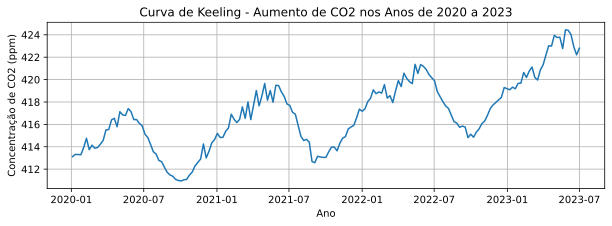

In [8]:
#ultimo tres anos
selected_years_data = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2023)]

selected_years = selected_years_data['Date']
co2_levels_selected = selected_years_data['CO2']

plt.figure(figsize=(10, 3)) 

# Cria um gráfico de linha usando os dados dos anos selecionados
plt.plot(selected_years, co2_levels_selected, marker='none')

# Adiciona rótulos aos eixos
plt.xlabel('Ano')
plt.ylabel('Concentração de CO2 (ppm)')

# Adiciona um título ao gráfico
plt.title('Curva de Keeling - Aumento de CO2 nos Anos de 2020 a 2023')

plt.grid(True)
plt.show()

Tendência Base Linear

In [9]:
days_since_start = (df['Date'] - df['Date'].min()).dt.days

coeffs = np.polyfit(days_since_start,df['CO2'],deg=1) 
print('Os dados têm uma tendência linear \n\
 1º grau coeff: %.3e (inclinação) \n\
 0º deg coeff: %.3e (interceptação)' 
     %(coeffs[0],coeffs[1])) 

df['linear trend'] = days_since_start * coeffs[0] + coeffs[1] 
df[' ppm relativo (lin)'] = df['CO2']-df['linear trend']

Os dados têm uma tendência linear 
 1º grau coeff: 4.456e-03 (inclinação) 
 0º deg coeff: 3.049e+02 (interceptação)


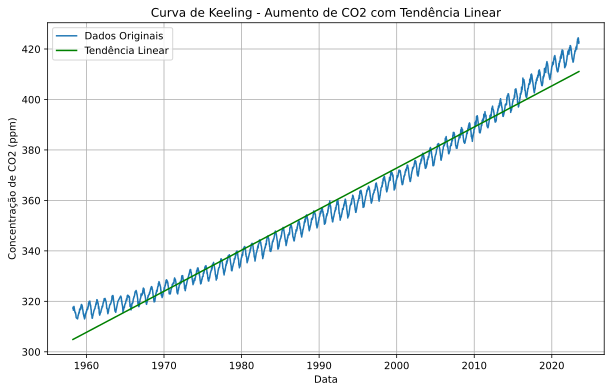

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['CO2'], marker='none', label='Dados Originais')

#gráfico de linha usando a tendência linear
plt.plot(df['Date'], df['linear trend'], color='green', label='Tendência Linear')

plt.xlabel('Data')
plt.ylabel('Concentração de CO2 (ppm)')

plt.title('Curva de Keeling - Aumento de CO2 com Tendência Linear')

plt.legend()
plt.grid(True)
plt.show()

In [11]:
coeffs = np.polyfit(days_since_start,df['CO2'],deg=2)
print('Data has a quadratic trend\n\
2nd deg coeff: %.3e (quad term)\n\
1st deg coeff: %.3e (slope)\n\
0th deg coeff: %.3e (intercept)'
     %(coeffs[0],coeffs[1],coeffs[2]))

df['quad trend'] = days_since_start**2*coeffs[0]+days_since_start*coeffs[1]+coeffs[2]
df['relative ppm (quad)'] = df['CO2']-df['quad trend']

Data has a quadratic trend
2nd deg coeff: 1.009e-07 (quad term)
1st deg coeff: 2.031e-03 (slope)
0th deg coeff: 3.148e+02 (intercept)


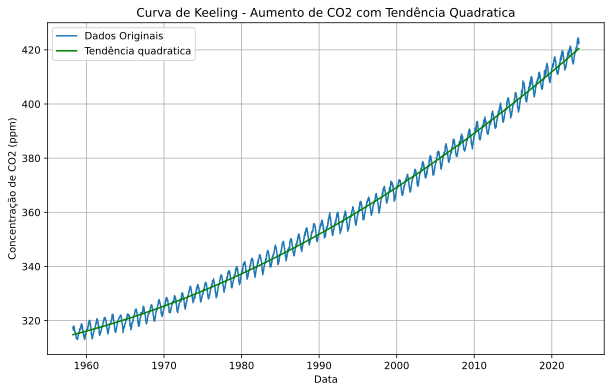

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['CO2'], marker='none', label='Dados Originais')

#gráfico de linha usando a tendência linear
plt.plot(df['Date'], df['quad trend'], color='green', label='Tendência quadratica')

plt.xlabel('Data')
plt.ylabel('Concentração de CO2 (ppm)')

plt.title('Curva de Keeling - Aumento de CO2 com Tendência Quadratica')

plt.legend()
plt.grid(True)
plt.show()

In [13]:
f_year =1 / 365.25
# Função que você está tentando ajustar
def test_func(t, c0, c1, c2, c3, c4):
    return c0 + c1 * t + c2 * t**2 + c3 * np.cos(2 * math.pi * f_year * t + c4)

# Ajuste da função aos dados
coeffs, coeffs_covariance = optimize.curve_fit(test_func, days_since_start, df['CO2'])

# Imprimir os valores dos coeficientes otimizados
print('Valores de coeficiente otimizados:')
for i in range(5):
    print('c %d : %.3e' % (i, coeffs[i]))

# Calcule os valores da tendência quadrática + senoidal
df['quad+sin trend'] = (
    coeffs[0]
    + coeffs[1] * days_since_start
    + coeffs[2] * days_since_start**2
    + coeffs[3] * np.cos(2 * math.pi * f_year * days_since_start + coeffs[4])
)

# Calcule a diferença entre os valores reais e os valores da tendência quad+sin
df['ppm relativo (quad+sin)'] = df['CO2'] - df['quad+sin trend']

Valores de coeficiente otimizados:
c 0 : 3.148e+02
c 1 : 2.040e-03
c 2 : 1.004e-07
c 3 : 2.866e+00
c 4 : -2.907e-01


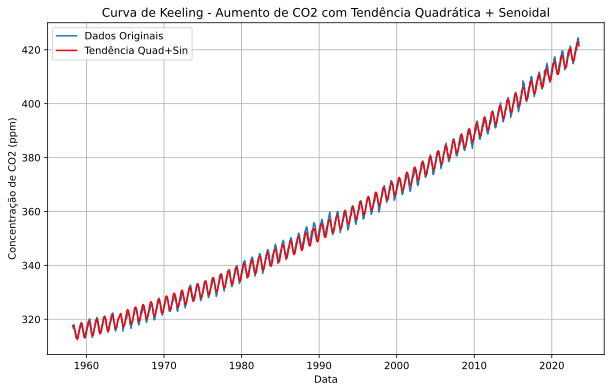

In [14]:
plt.figure(figsize=(10, 6))

plt.plot(df['Date'], df['CO2'], marker='none', label='Dados Originais')

# Gráfico de linha usando a tendência quadrática + senoidal
plt.plot(df['Date'], df['quad+sin trend'], color='red', label='Tendência Quad+Sin')

plt.xlabel('Data')
plt.ylabel('Concentração de CO2 (ppm)')

plt.title('Curva de Keeling - Aumento de CO2 com Tendência Quadrática + Senoidal')

plt.legend()

plt.grid(True)
plt.show()